# Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting 
the number of rings through a microscope -- a boring and time-consuming task. Other measurements, 
which are easier to obtain, are used to predict the age. Further information, such as weather 
patterns and location (hence food availability) may be required to solve the problem.


Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number
of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.shape

(4177, 9)

In [5]:
df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2388,I,0.515,0.375,0.14,0.6505,0.2495,0.141,0.2215,10


In [6]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3369,I,0.610,0.460,0.170,1.2780,0.4100,0.2570,0.370,17
1884,M,0.555,0.400,0.130,0.7075,0.3320,0.1585,0.180,7
996,M,0.590,0.465,0.155,1.1360,0.5245,0.2615,0.275,11
590,I,0.510,0.400,0.150,0.7450,0.2865,0.1675,0.235,13
209,I,0.370,0.280,0.095,0.2655,0.1220,0.0520,0.080,7


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


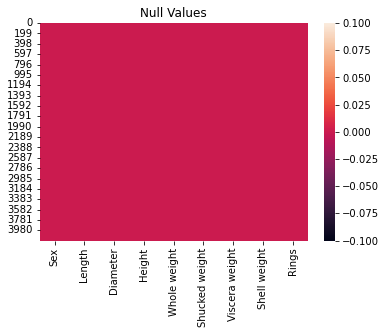

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Checking the Null Values in the Dataset

In [9]:
df.isnull().sum().sum()

0

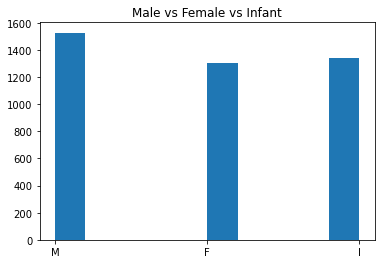

In [10]:
df['Sex'].hist(grid=False)
plt.title('Male vs Female vs Infant')
plt.show()

In [11]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# Label Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [13]:
le.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

In [14]:
le.inverse_transform([1,2,0])

array(['I', 'M', 'F'], dtype=object)

In [15]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


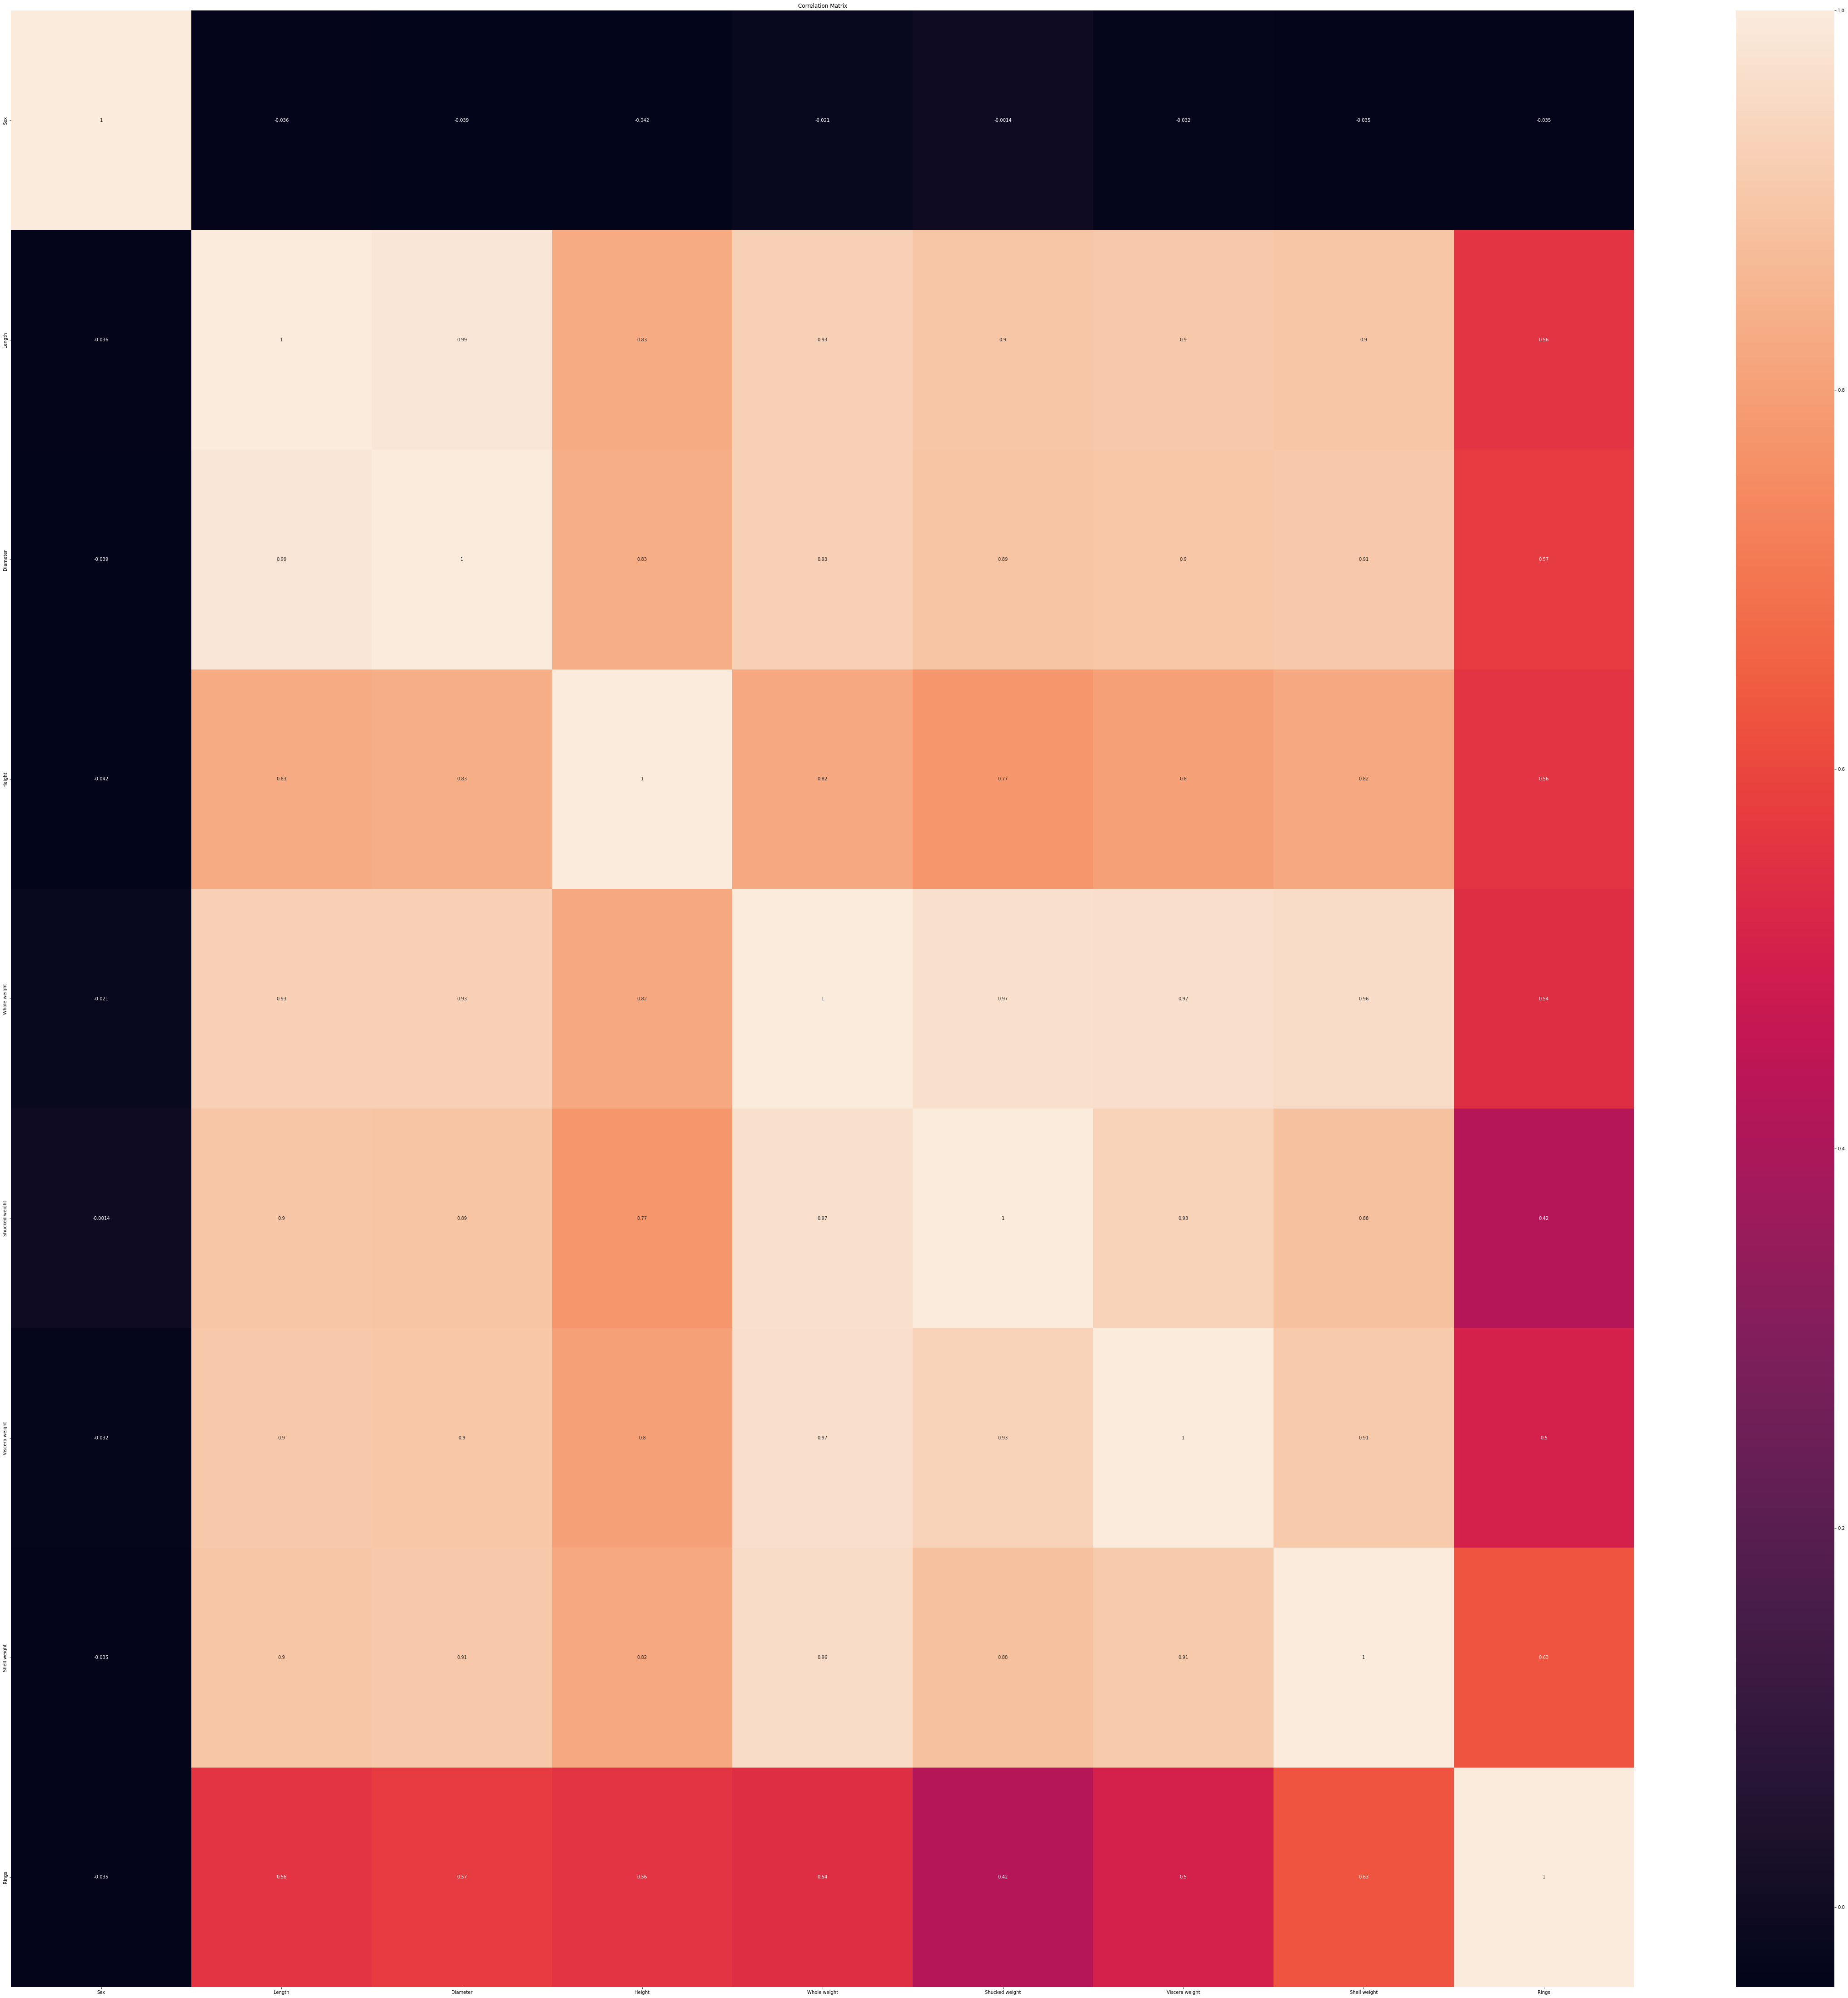

In [16]:
corr_mat=df.corr()
#Size of the canvas
plt.figure(figsize=[80,80])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.jpg')
plt.show()

We can clearly see that the gender column affects the dataset and it is showing Negative correlation 
so it is good to exclude the column sex

In [17]:
corr_matrix=df.corr()
corr_matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [18]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [19]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

# Splitting the independent and dependent variable in x and y before removing the skewness

In [20]:
x=df.drop('Sex',axis=1)
y=df['Rings']

In [21]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [24]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [25]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [26]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

5    0.039780
4    0.027351
6    0.023390
7    0.004429
3   -0.003980
1   -0.065977
0   -0.066669
2   -0.115483
dtype: float64

In [27]:
type(x_new)

numpy.ndarray

In [28]:
x.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [29]:
x=pd.DataFrame(x_new,columns=x.columns)

In [30]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135
...,...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,0.462368
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,0.156908
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,-0.176075
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,0.156908


In [31]:
x.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Rings             0.004429
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
dtype: float64

# Visualization 

<AxesSubplot:xlabel='Length', ylabel='Density'>

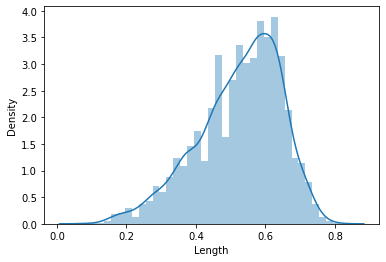

In [32]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

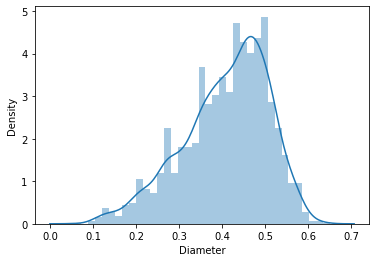

In [33]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

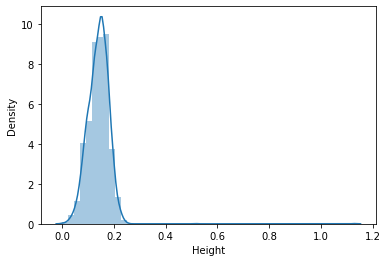

In [34]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

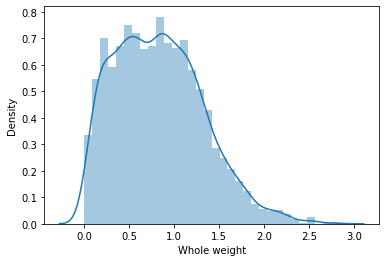

In [35]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

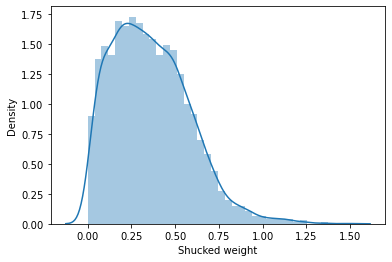

In [36]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

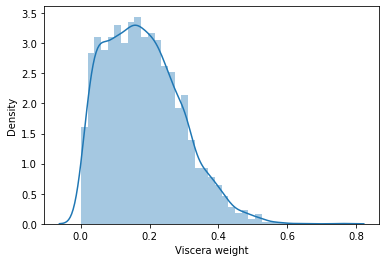

In [37]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

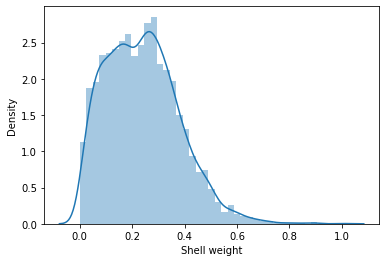

In [38]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

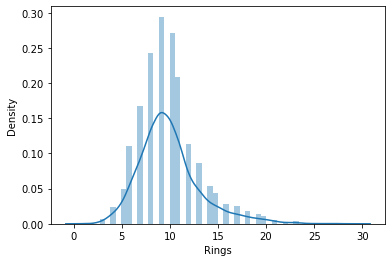

In [39]:
sns.distplot(df['Rings'])

Scatter plots

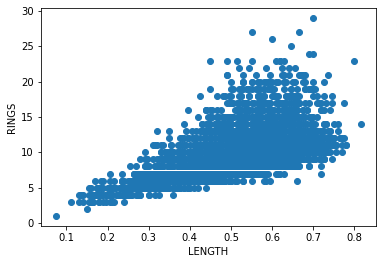

In [40]:
plt.scatter(df['Length'],df['Rings'])
plt.xlabel('LENGTH')
plt.ylabel('RINGS')
plt.show()

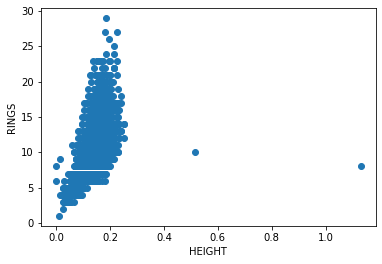

In [41]:
plt.scatter(df['Height'],df['Rings'])
plt.xlabel('HEIGHT')
plt.ylabel('RINGS')
plt.show()

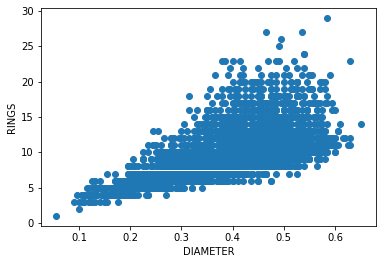

In [42]:
plt.scatter(df['Diameter'],df['Rings'])
plt.xlabel('DIAMETER')
plt.ylabel('RINGS')
plt.show()

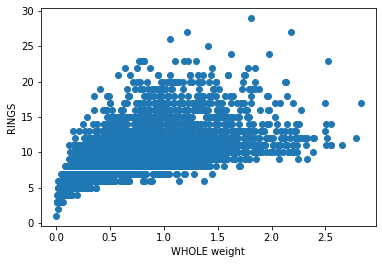

In [43]:
plt.scatter(df['Whole weight'],df['Rings'])
plt.xlabel('WHOLE weight')
plt.ylabel('RINGS')
plt.show()

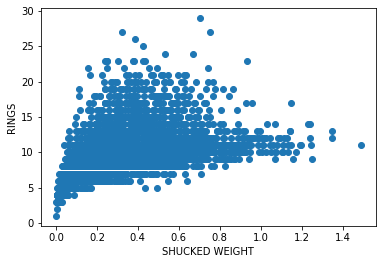

In [44]:
plt.scatter(df['Shucked weight'],df['Rings'])
plt.xlabel('SHUCKED WEIGHT')
plt.ylabel('RINGS')
plt.show()

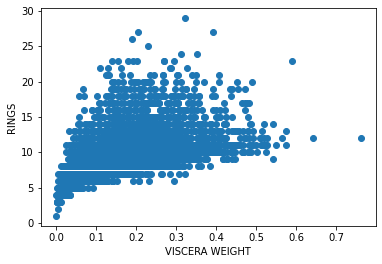

In [45]:
plt.scatter(df['Viscera weight'],df['Rings'])
plt.xlabel('VISCERA WEIGHT')
plt.ylabel('RINGS')
plt.show()

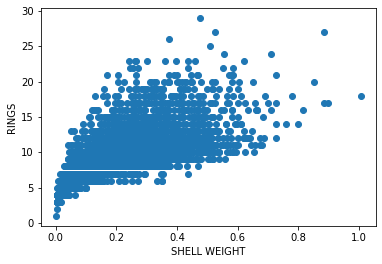

In [46]:
plt.scatter(df['Shell weight'],df['Rings'])
plt.xlabel('SHELL WEIGHT')
plt.ylabel('RINGS')
plt.show()

REGRESSION PLOTS

(0.001, 30.4)

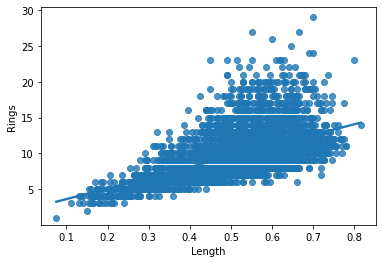

In [47]:
sns.regplot(x='Length',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

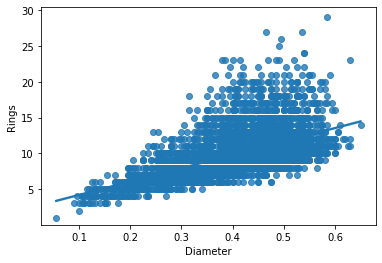

In [48]:
sns.regplot(x='Diameter',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 64.71685223207189)

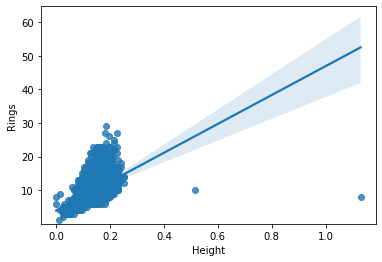

In [49]:
sns.regplot(x='Height',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

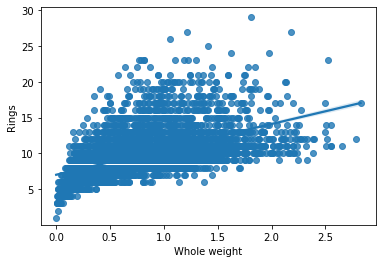

In [50]:
sns.regplot(x='Whole weight',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

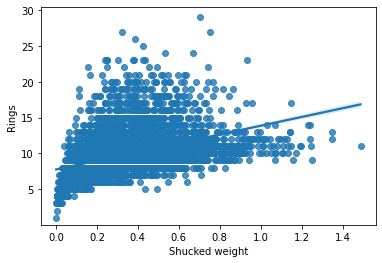

In [51]:
sns.regplot(x='Shucked weight',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

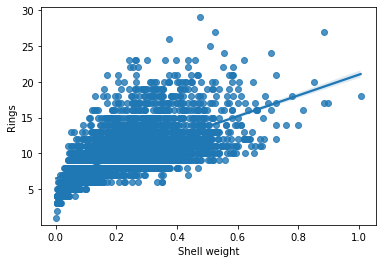

In [52]:
sns.regplot(x='Shell weight',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

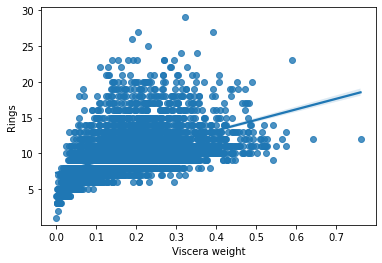

In [53]:
sns.regplot(x='Viscera weight',y='Rings',data=df)
plt.ylim(0.001,)

(0.001, 30.4)

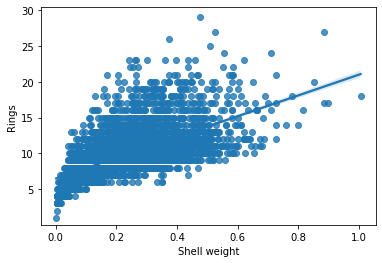

In [54]:
sns.regplot(x='Shell weight',y='Rings',data=df)
plt.ylim(0.001,)

All the column shows the Positive linear relationship with output variable

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

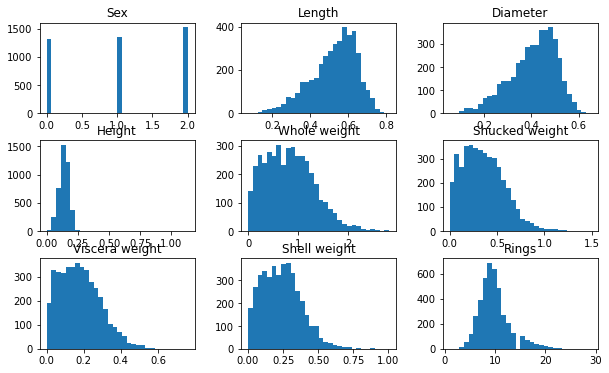

In [55]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [56]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [57]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

2    0.409563
6    0.032854
4    0.025337
3    0.024822
5    0.023317
1    0.015076
0    0.014569
7   -0.026012
dtype: float64

In [58]:
type(x_new)

numpy.ndarray

In [59]:
x.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [60]:
x=pd.DataFrame(x_new,columns=x.columns)

In [61]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.695134,-0.563253,-1.114457,-0.581665,-0.540627,-0.691155,-0.589287,1.477232
1,-1.378422,-1.369634,-1.242040,-1.345161,-1.312084,-1.336900,-1.330411,-0.949270
2,-0.090853,-0.011921,-0.106960,-0.205732,-0.365651,-0.250699,-0.100741,-0.172117
3,-0.803522,-0.563253,-0.357957,-0.576841,-0.591345,-0.544694,-0.546545,0.160910
4,-1.490115,-1.438419,-1.499106,-1.405366,-1.380715,-1.457120,-1.482577,-0.949270
...,...,...,...,...,...,...,...,...
4172,0.231416,0.328443,0.649598,0.234518,0.194693,0.642221,0.190614,0.465393
4173,0.478871,0.211683,-0.106960,0.389231,0.495848,0.437341,0.272941,0.160910
4174,0.581969,0.635101,1.637564,0.775426,0.838263,1.015191,0.596935,-0.172117
4175,0.850218,0.763780,0.271433,0.629622,0.858846,0.816504,0.517437,0.160910


In [62]:
sk=x.skew()

In [63]:
sk[np.abs(sk)>0.5].all()

True

In [64]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [65]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed

# Checking for outliers

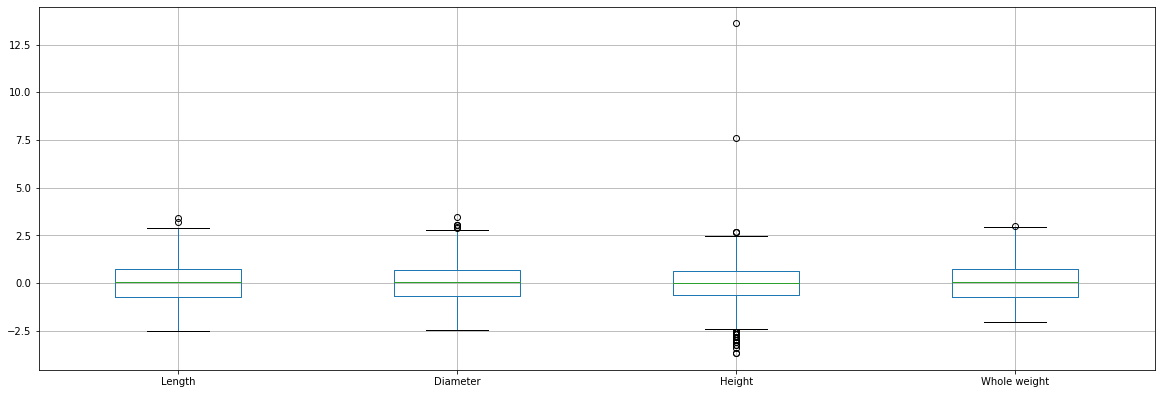

In [66]:
# plotting Boxplot for 1st 4 columns.
x.iloc[:,0:4].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

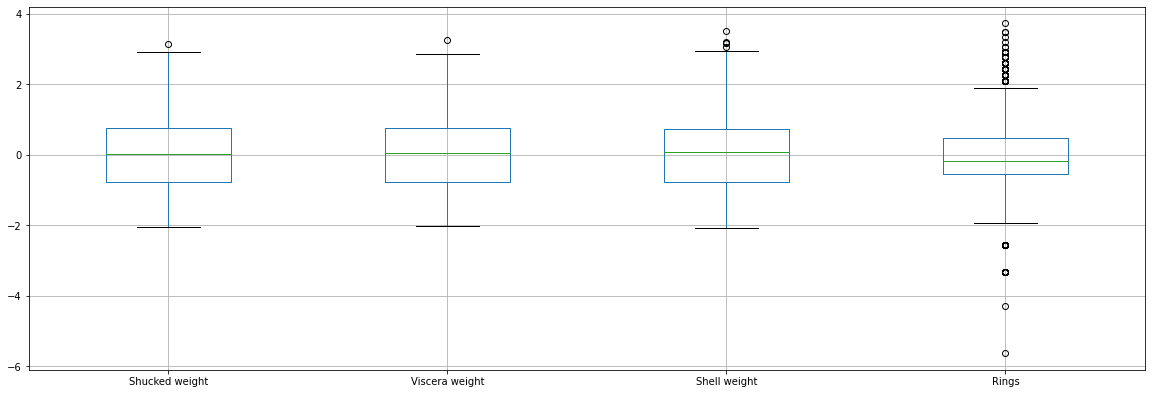

In [67]:
# plotting Boxplot for next 4 columns.
x.iloc[:,4:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are present in my data

In [68]:
# finding boundary values
print("Highest allowed",df['Length'].mean()+3*df['Length'].std())
print("Lowest allowed",df['Length'].mean()-3*df['Length'].std())

Highest allowed 0.8842708372874097
Lowest allowed 0.1637133618986099


In [69]:
# Finding the outliers
df[(df['Length']>0.88) | (df['Length']<0.16)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
526,2,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,1,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
719,1,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
1429,1,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
1986,1,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,4
2114,1,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
2381,2,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5


In [70]:
# Trimming the outliers
new_df=df[(df['Length']<0.88)&(df['Length']>0.16)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [71]:
# Capping on outliers
upper_limit=df['Length'].mean()+3*df['Length'].std()
lower_limit=df['Length'].mean()-3*df['Length'].std()

In [72]:
df['Length'] = np.where(
    df['Length']>upper_limit,
    upper_limit,
    np.where(
        df['Length']<lower_limit,
        lower_limit,
        df['Length']
    )
)

In [73]:
df['Length'].describe()

count    4177.000000
mean        0.524074
std         0.119832
min         0.163713
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [74]:
# finding boundary values
print("Highest allowed",df['Diameter'].mean()+3*df['Diameter'].std())
print("Lowest allowed",df['Diameter'].mean()-3*df['Diameter'].std())

Highest allowed 0.7056008528898465
Lowest allowed 0.11016165608789152


In [75]:
# Finding the outliers
df[(df['Diameter']>0.70) | (df['Diameter']<0.11)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1,0.163713,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1,0.163713,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1,0.163713,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
696,1,0.163713,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
719,1,0.163713,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
1429,1,0.163713,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
2114,1,0.163713,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
3837,1,0.170000,0.105,0.035,0.0340,0.0120,0.0085,0.0050,4
3899,1,0.163713,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4


In [76]:
# Trimming the outliers
new_df=df[(df['Diameter']<0.70)&(df['Diameter']>0.11)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [77]:
# Capping on outliers
upper_limit=df['Diameter'].mean()+3*df['Diameter'].std()
lower_limit=df['Diameter'].mean()-3*df['Diameter'].std()

In [78]:
df['Diameter'] = np.where(
    df['Diameter']>upper_limit,
    upper_limit,
    np.where(
        df['Diameter']<lower_limit,
        lower_limit,
        df['Diameter']
    )
)

In [79]:
df['Diameter'].describe()

count    4177.000000
mean        0.407913
std         0.099140
min         0.110162
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

In [80]:
# finding boundary values
print("Highest allowed",df['Height'].mean()+3*df['Height'].std())
print("Lowest allowed",df['Height'].mean()-3*df['Height'].std())

Highest allowed 0.26499756915143247
Lowest allowed 0.014035229507890296


In [81]:
# Finding the outliers
df[(df['Height']>0.26) | (df['Height']<0.014)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1,0.163713,0.110162,0.010,0.002,0.0010,0.0005,0.0015,1
1257,1,0.430000,0.340000,0.000,0.428,0.2065,0.0860,0.1150,8
1417,2,0.705000,0.565000,0.515,2.210,1.1075,0.4865,0.5120,10
2051,0,0.455000,0.355000,1.130,0.594,0.3320,0.1160,0.1335,8
3996,1,0.315000,0.230000,0.000,0.134,0.0575,0.0285,0.3505,6


In [82]:
# Trimming the outliers
new_df=df[(df['Height']<0.26)&(df['Height']>0.014)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [83]:
# Capping on outliers
upper_limit=df['Height'].mean()+3*df['Height'].std()
lower_limit=df['Height'].mean()-3*df['Height'].std()

In [84]:
df['Height'] = np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

In [85]:
df['Height'].describe()

count    4177.000000
mean        0.139257
std         0.038552
min         0.014035
25%         0.115000
50%         0.140000
75%         0.165000
max         0.264998
Name: Height, dtype: float64

In [86]:
# finding boundary values
print("Highest allowed",df['Shucked weight'].mean()+3*df['Shucked weight'].std())
print("Lowest allowed",df['Shucked weight'].mean()-3*df['Shucked weight'].std())

Highest allowed 1.0252563357278615
Lowest allowed -0.3065213584714594


In [87]:
# Finding the outliers
df[(df['Shucked weight']>0.25) | (df['Shucked weight']<0.023)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
13,0,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,10
15,2,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,12
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [88]:
# Trimming the outliers
new_df=df[(df['Shucked weight']<0.25)&(df['Shucked weight']>0.023)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
...,...,...,...,...,...,...,...,...,...
4162,2,0.385,0.255,0.100,0.3175,0.1370,0.0680,0.092,8
4163,1,0.390,0.310,0.085,0.3440,0.1810,0.0695,0.079,7
4164,1,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.081,7
4165,1,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.088,7


In [89]:
# Capping on outliers
upper_limit=df['Shucked weight'].mean()+3*df['Shucked weight'].std()
lower_limit=df['Shucked weight'].mean()-3*df['Shucked weight'].std()

In [90]:
df['Shucked weight'] = np.where(
    df['Shucked weight']>upper_limit,
    upper_limit,
    np.where(
        df['Shucked weight']<lower_limit,
        lower_limit,
        df['Shucked weight']
    )
)

In [91]:
df['Shucked weight'].describe()

count    4177.000000
mean        0.358306
std         0.218260
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.025256
Name: Shucked weight, dtype: float64

In [92]:
# finding boundary values
print("Viscera allowed",df['Viscera weight'].mean()+3*df['Viscera weight'].std())
print("Viscera allowed",df['Viscera weight'].mean()-3*df['Viscera weight'].std())

Viscera allowed 0.5094363586315793
Viscera allowed -0.14824914292652724


In [93]:
# Finding the outliers
df[(df['Viscera weight']>0.50) | (df['Viscera weight']<-0.14)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
170,2,0.695,0.550,0.215,1.9565,0.712500,0.5410,0.5900,14
1048,2,0.710,0.565,0.205,2.1980,1.012000,0.5225,0.5475,11
1052,2,0.765,0.600,0.220,2.3020,1.007000,0.5090,0.6205,12
1204,2,0.735,0.585,0.185,2.1240,0.952000,0.5500,0.5000,11
1206,0,0.750,0.570,0.210,2.2360,1.025256,0.5195,0.5450,11
1207,0,0.755,0.625,0.210,2.5050,1.025256,0.5130,0.6785,11
1422,2,0.720,0.575,0.215,2.1730,0.951500,0.5640,0.5365,12
1427,0,0.750,0.610,0.235,2.5085,1.025256,0.5190,0.6120,14
1757,0,0.730,0.560,0.190,1.9425,0.799000,0.5195,0.5655,11
1759,0,0.740,0.565,0.205,2.1190,0.965500,0.5185,0.4820,12


In [94]:
# Trimming the outliers
new_df=df[(df['Viscera weight']<0.50)&(df['Viscera weight']>-0.14)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [95]:
# Capping on outliers
upper_limit=df['Viscera weight'].mean()+3*df['Viscera weight'].std()
lower_limit=df['Viscera weight'].mean()-3*df['Viscera weight'].std()

In [96]:
df['Viscera weight'] = np.where(
    df['Viscera weight']>upper_limit,
    upper_limit,
    np.where(
        df['Viscera weight']<lower_limit,
        lower_limit,
        df['Viscera weight']
    )
)

In [97]:
df['Viscera weight'].describe()

count    4177.000000
mean        0.180383
std         0.108866
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.509436
Name: Viscera weight, dtype: float64

In [98]:
# finding boundary values
print("Highest allowed",df['Shell weight'].mean()+3*df['Shell weight'].std())
print("Lowest allowed",df['Shell weight'].mean()-3*df['Shell weight'].std())

Highest allowed 0.6564388680356752
Lowest allowed -0.1787771490986393


In [99]:
# Finding the outliers
df[(df['Shell weight']>0.65) | (df['Shell weight']<-0.17)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
81,2,0.620,0.510,0.175,1.6150,0.510500,0.192000,0.6750,12
129,2,0.710,0.540,0.165,1.9590,0.766500,0.261000,0.7800,18
163,0,0.725,0.560,0.210,2.1410,0.650000,0.398000,1.0050,18
164,0,0.650,0.545,0.230,1.7520,0.560500,0.289500,0.8150,16
165,2,0.725,0.570,0.190,2.5500,1.025256,0.483000,0.7250,14
166,0,0.725,0.575,0.175,2.1240,0.765000,0.451500,0.8500,20
168,2,0.705,0.560,0.220,1.9810,0.817500,0.308500,0.7600,14
277,2,0.610,0.500,0.240,1.6420,0.532000,0.334500,0.6900,18
334,0,0.740,0.600,0.195,1.9740,0.598000,0.408500,0.7100,16
358,2,0.745,0.585,0.215,2.4990,0.926500,0.472000,0.7000,17


In [100]:
# Trimming the outliers
new_df=df[(df['Shell weight']<0.65)&(df['Shell weight']>-0.17)]
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [101]:
# Capping on outliers
upper_limit=df['Shell weight'].mean()+3*df['Shell weight'].std()
lower_limit=df['Shell weight'].mean()-3*df['Shell weight'].std()

In [102]:
df['Shell weight'] = np.where(
    df['Shell weight']>upper_limit,
    upper_limit,
    np.where(
        df['Shell weight']<lower_limit,
        lower_limit,
        df['Shell weight']
    )
)

In [103]:
df['Shell weight'].describe()

count    4177.000000
mean        0.238265
std         0.137123
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         0.656439
Name: Shell weight, dtype: float64

In [104]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [105]:
df.drop('Sex',axis=1,inplace=True)

In [106]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [107]:
df.shape

(4177, 8)

# Splitting independent and dependent variable for train_test_split

In [108]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [109]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [110]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [111]:
x.shape

(4177, 7)

In [112]:
y.shape

(4177,)

Training process began

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

Creating train test split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [115]:
x_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [116]:
x_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...
575,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500
3231,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250
1084,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170
290,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250


In [117]:
y_train

3141     5
3521     3
883     15
3627    10
2106    14
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: Rings, Length: 3341, dtype: int64

In [118]:
x_train.shape

(3341, 7)

In [119]:
y_train.shape

(3341,)

In [120]:
x_test.shape

(836, 7)

In [121]:
y_test.shape

(836,)

In [122]:
lr=LinearRegression()

In [123]:
lr.fit(x_train,y_train)

LinearRegression()

In [124]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Length,-0.682071
Diameter,11.755097
Height,20.372399
Whole weight,8.589417
Shucked weight,-20.662736
Viscera weight,-9.536804
Shell weight,9.128305


In [125]:
lr.intercept_

2.484060949817187

To Make Predictions on the test data

In [126]:
y_pred=lr.predict(x_test)

In [127]:
com_df=pd.DataFrame({'Actual Rings':y_test,'Predicted Rings':y_pred})
com_df

,Actual Rings,Predicted Rings
668,13,13.149979
1580,8,9.590423
3784,11,10.087568
463,5,5.486077
2615,12,10.409670
...,...,...
575,11,10.285010
3231,12,8.790088
1084,7,8.527239
290,17,12.338523


In [128]:
pd.set_option('display.max_rows',None)

In [129]:
com_df

,Actual Rings,Predicted Rings
668,13,13.149979
1580,8,9.590423
3784,11,10.087568
463,5,5.486077
2615,12,10.409670
1399,11,11.987783
2054,7,7.683030
2058,8,9.831782
217,7,8.684711
1931,9,11.986631


In [130]:
com_df.shape

(836, 2)

In [131]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean Absolute error: 1.5954357284684233
Mean Squared error: 4.9578933118598085
Root Squared error: 2.2266327294504156


In [132]:
df.describe(include='all')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.524074,0.407913,0.139257,0.828742,0.358306,0.180383,0.238265,9.933684
std,0.119832,0.099140,0.038552,0.490389,0.218260,0.108866,0.137123,3.224169
min,0.163713,0.110162,0.014035,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,0.264998,2.825500,1.025256,0.509436,0.656439,29.000000


If we see the mean of rings and compare it with root mean squared value we can clearly get that rings
mean is slightly greater than 23%. So our algorithm was not so accurate but can still make reasonably
good predictions.

# TO find out Coefficient of Determination - r2 score

In [133]:
from sklearn.metrics import r2_score
print('Coefficient of Determination : ',r2_score(y_test,y_pred))

Coefficient of Determination :  0.543485149051442


# Determining Age 

As per the requirement Age can be determined from rings which is added to 1.5 

In [135]:
com_df['Actual Age']=com_df['Actual Rings']+1.5

In [136]:
com_df['Predicted Age']=com_df['Predicted Rings']+1.5

In [137]:
com_df

,Actual Rings,Predicted Rings,Actual Age,Predicted Age
668,13,13.149979,14.5,14.649979
1580,8,9.590423,9.5,11.090423
3784,11,10.087568,12.5,11.587568
463,5,5.486077,6.5,6.986077
2615,12,10.409670,13.5,11.909670
1399,11,11.987783,12.5,13.487783
2054,7,7.683030,8.5,9.183030
2058,8,9.831782,9.5,11.331782
217,7,8.684711,8.5,10.184711
1931,9,11.986631,10.5,13.486631
